## Import required packages

In [20]:
#Regular EDA (exploratory data analysis) and plotting libraries
import math
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt


#Package for splitting the dataset to training set and test set
from sklearn.model_selection import train_test_split, cross_val_predict

#Package for Linear Regression model
from sklearn.linear_model import LinearRegression

#Packages to perform Exhaustive Search
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score

#Package for KNN Regressor model
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor

#Package for data standardization
from sklearn.preprocessing import StandardScaler

#Package for model evaluation
from dmba import regressionSummary, classificationSummary
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score

## Importing housing dataset

In [21]:
#Importing housing dataset
housing_df = pd.read_csv('HousingDataSet.csv')

## Data preprocessing

In [22]:
#Viewing the first 10 rows
housing_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [23]:
#Viewing dataframe structure
housing_df.shape

(21613, 21)

In [24]:
#Counting the number of values in each column
housing_df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [25]:
#Counting the number of unique value in each column
housing_df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [26]:
#Rechecking if there are any null values in our dataset
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Text(0.5, 1.0, 'Empty Data')

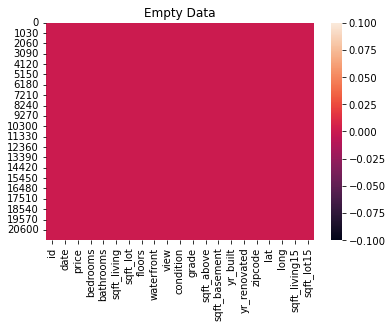

In [27]:
#Plotting null values in our dataset by using heatmap
sns.heatmap(housing_df.isnull())
plt.title("Empty Data")

In [28]:
#Because yr_built is a ordinal variable, I will transform it to a numeric variable.
#Creating AGE variable (age of the property)
housing_df['age'] = 2022 - housing_df['yr_built']

In [29]:
#Changing yr_renovated variable to dummy variable (whether the apartment was renovated or not)
housing_df.loc[housing_df['yr_renovated'] != 0, 'yr_renovated'] = 1

In [39]:
#Renaming column yr_renovated to renovated
housing_df.rename(columns={'yr_renovated': 'renovated'}, inplace=True)

In [40]:
#Droping unnecessary columns id, date, yr_built, zipcode in housing dataset
housing_df.drop(['id', 'date', 'yr_built', 'zipcode'], axis=1, inplace=True)

In [41]:
#Viewing dataframe structure
housing_df.shape

(21613, 18)

## Data partitioning

In [42]:
#Creating X and y data matrices (X = predictor variables, y = outcome variable)
X=housing_df.drop(labels=['price'], axis=1)
y=housing_df['price']

In [43]:
#Splitting the dataset into training set size = 0.6 and validation set size = 0.4
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [44]:
train_X.shape, train_y.shape, valid_X.shape, valid_y.shape

((12967, 17), (12967,), (8646, 17), (8646,))

To avoid overfitting, we will be running all the functions and training only on the training set (not train again on the test dataset), and then what features we take away from the train dataset, we are going do the same on the validation set.

## Feature selection using correlation heatmap

<AxesSubplot:>

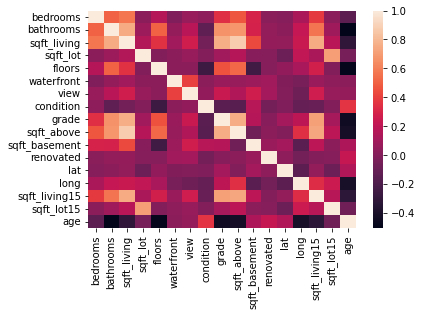

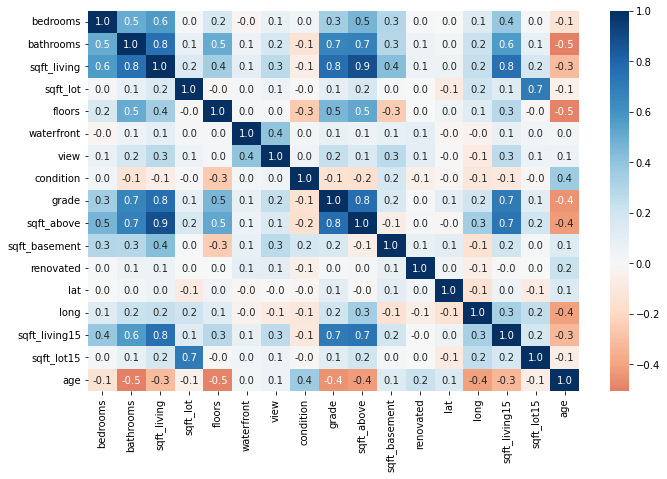

In [45]:
#Constructing a heatmap of correlation on the training set (for only independent features)
corr = train_X.corr()
sns.heatmap(corr)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

In [46]:
#Build corr function and use it to eliminate predictors on train x and valid x (sqft_above)
#With the following function we can select highly correlated features
#The function will remove the first feature that is correlated with other features

def correlation(dataset, threshold): # correlation-function name, dataset=train_X, threshold=0.8)
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)): # i goes through all the values in the correlation matrix columns
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we use each absolute coeff value to compare with threshold value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname) # add the column name to the col_corr set created
    return col_corr

In [47]:
#Build corr function and use it to eliminate predictors on train x and valid x (sqft_above)
#Count the number of highly correlated features (cutoff 0.8)
corr_features = correlation(train_X, 0.8)
len(set(corr_features))

1

In [48]:
#Build corr function and use it to eliminate predictors on train x and valid x (sqft_above)
#Print the name of highly correlated features
corr_features

{'sqft_above'}

In [49]:
#Build corr function and use it to eliminate predictors on train x and valid x (sqft_above)
#Remove highly correlated feature (sqft_above) out of training dataset
train_X.drop(corr_features,axis=1, inplace= True)

In [50]:
#Build corr function and use it to eliminate predictors on train x and valid x (sqft_above)
#Remove highly correlated feature (sqft_above) out of test dataset
valid_X.drop(corr_features,axis=1, inplace= True)

In [53]:
train_X.shape, valid_X.shape

((12967, 16), (8646, 16))

## Demo Linear Regression model

In [54]:
#Build demo regression model
model1 = LinearRegression().fit(train_X, train_y)

In [55]:
print('Intercept:', model1.intercept_)
print(pd.DataFrame({'Predictor': train_X.columns, 'Coefficients': model1.coef_}))

Intercept: -41033285.5056233
        Predictor   Coefficients
0        bedrooms  -30947.620818
1       bathrooms   40082.014195
2     sqft_living     172.809372
3        sqft_lot       0.095906
4          floors    3337.586847
5      waterfront  547255.098118
6            view   47838.310839
7       condition   29951.082945
8           grade   97684.365673
9   sqft_basement     -30.578665
10      renovated   48097.996962
11            lat  573399.966345
12           long -105769.167222
13  sqft_living15      25.480415
14     sqft_lot15      -0.286905
15            age    2413.528549


In [56]:
# print performance measures (training data)
regressionSummary(train_y, model1.predict(train_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 195509.7713
            Mean Absolute Error (MAE) : 123697.5277
          Mean Percentage Error (MPE) : -4.2687
Mean Absolute Percentage Error (MAPE) : 25.1152


In [57]:
# Use predict() to make predictions on test set
y_pred1 = model1.predict(valid_X)

In [58]:
result = pd.DataFrame({'Predicted Values': y_pred1, 'Actual Values': valid_y, 'Residuals': valid_y - y_pred1})
print(result.head(2))

       Predicted Values  Actual Values      Residuals
15544     651944.764330       459000.0 -192944.764330
17454     434907.786287       445000.0   10092.213713


In [59]:
#print performace measures (test data)
regressionSummary(valid_y, model1.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 2777.5995
       Root Mean Squared Error (RMSE) : 213188.0633
            Mean Absolute Error (MAE) : 127194.4774
          Mean Percentage Error (MPE) : -3.9283
Mean Absolute Percentage Error (MAPE) : 25.2598


In [60]:
#Predictive accuracy measurement for demo model
from sklearn.metrics import r2_score
print('Coefficient of determination (R^2): %.2f'
      % r2_score(valid_y, y_pred1))
#Coefficient of determination measures how well the regession model predicts the outcome variable.

Coefficient of determination (R^2): 0.69


## Conducting exhaustive search

In [62]:
#Exhaustive Search Code on training dataset
def train_model(variables):
    model1 = LinearRegression()
    model1.fit(train_X[list(variables)], train_y)
    return model1
#use funtion to pick list of variables all over again

def score_model(model1, variables):
    pred_y = model1.predict(train_X[list(variables)])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model1)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model1 = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model1.predict(train_X[variables]), model1)

    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC':AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))

#Note: 𝑅𝑎𝑑𝑗^2 0.685 indicates that a model with 6 predictors is good (not so different with R^2 0.695 of 16 predictors).
#This model can help us save storage space, amd time on processing/analysis

,n,r2adj,AIC,age,bathrooms,bedrooms,condition,floors,grade,lat,long,renovated,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront
0,1,0.486086,359591.114468,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,2,0.566486,357386.001830,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
2,3,0.609097,356045.387343,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
3,4,0.643432,354854.266097,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False
4,5,0.676026,353612.217039,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True
5,6,0.685241,353239.026458,True,False,False,False,False,True,True,False,False,False,True,False,False,False,True,True
6,7,0.688108,353121.383764,True,False,True,False,False,True,True,False,False,False,True,False,False,False,True,True
7,8,0.691060,352999.075935,True,True,True,False,False,True,True,False,False,False,True,False,False,False,True,True
8,9,0.692649,352933.214896,True,True,True,True,False,True,True,False,False,False,True,False,False,False,True,True
9,10,0.693502,352898.171531,True,True,True,True,False,True,True,False,False,True,True,False,False,False,True,True


In [88]:
#Remove unnecessary features out of traing dataset, only keep 'true' predictors at line n = 6
train_X = train_X[['age', 'grade', 'lat', 'sqft_living', 'view', 'waterfront']]

In [89]:
#Remove unnecessary features out of test dataset
valid_X = valid_X[['age', 'grade', 'lat', 'sqft_living', 'view', 'waterfront']]

## Multiple linear regression model

In [90]:
#Build new model with 6 predictors based on Exhaustive Search result
model2 = LinearRegression().fit(train_X, train_y)

In [91]:
print('Intercept:', model2.intercept_)
print(pd.DataFrame({'Predictor': train_X.columns, 'Coefficients': model2.coef_}))

Intercept: -28213094.424261123
     Predictor   Coefficients
0          age    2502.715971
1        grade  114286.776696
2          lat  575831.232756
3  sqft_living     166.491132
4         view   51684.316285
5   waterfront  574552.675588


In [92]:
# Print performance measures (training data)
regressionSummary(train_y, model2.predict(train_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 199015.2076
            Mean Absolute Error (MAE) : 126329.9038
          Mean Percentage Error (MPE) : -4.6252
Mean Absolute Percentage Error (MAPE) : 25.7036


In [93]:
# Use predict() to make predictions on a new set
y_pred2 = model2.predict(valid_X)

In [94]:
#Use regrssion model to predict the prices of the two houses
result = pd.DataFrame({'Predicted Values': y_pred2, 'Actual Values': valid_y, 'Residuals': valid_y - y_pred2})
print(result.head(2))

       Predicted Values  Actual Values      Residuals
15544     650302.099809       459000.0 -191302.099809
17454     431376.494626       445000.0   13623.505374


In [95]:
#print performace measures (test data)
regressionSummary(valid_y, model2.predict(valid_X))

#Training data Errors < Test data errors, model is not overfitting
#The difference in errors between Training set and Test set are not significant => good


Regression statistics

                      Mean Error (ME) : 2964.8910
       Root Mean Squared Error (RMSE) : 217316.3443
            Mean Absolute Error (MAE) : 130093.2590
          Mean Percentage Error (MPE) : -4.3570
Mean Absolute Percentage Error (MAPE) : 25.8786


In [96]:
#Predictive accuracy measurement
from sklearn.metrics import r2_score
print('Coefficient of determination (R^2): %.2f'
      % r2_score(valid_y, y_pred2))
#Coefficient of determination measures how well the regession model predicts the outcome variable.
#the larger the R^2, the better the regression model can explain the outcome variable and fit the actual values

Coefficient of determination (R^2): 0.68


Text(0.5, 0, 'Training')

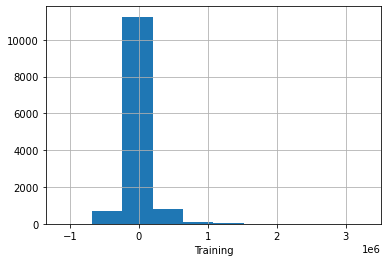

In [97]:
#Performance measurement
#charts of error distribution for Training set and Test set
#training set
train_e = train_y - model2.predict(train_X)
fig, ax = plt.subplots()
ax = train_e.hist()
ax.set_xlabel('Training')

Text(0.5, 0, 'Validation')

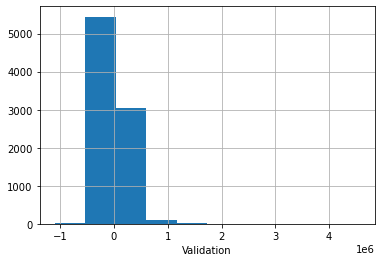

In [98]:
# validation set
valid_e = valid_y - model2.predict(valid_X)
fig, ax = plt.subplots()
ax = valid_e.hist()
ax.set_xlabel('Validation')

Similar error distribution (highly distributed around 0) of training and valid sets 

In [99]:
#When evaluate performance of model 1 (16 predictors) and 2 (6 predictors)
#Root Mean Squared Error (RMSE) : model 1 213188.0633 ~ model 2 217316.3443
#Coefficient of determination (R^2): model1 0.69 ~ model2 0.68
#But we do a good job on eliminating redundant variables (10) which avoids a waste of space in the source, 
#makes us easier to focus on those that important, and optimize the speed of model deployment

## KNN REGRESSOR MODEL BUILDING

To build the KNN regressor model we will use the same predictors 'age', 'grade', 'lat', 'sqft_living', 'view', 'waterfront' on the same training and test datasets. Later we need to compare the performance of these 2 models

In [100]:
#Construct model with k = 5
model3 = KNeighborsRegressor(n_neighbors=5).fit(train_X, train_y)


In [101]:
# Print performance measures (training data) (model 3)
regressionSummary(train_y, model3.predict(train_X))


Regression statistics

                      Mean Error (ME) : 3323.2402
       Root Mean Squared Error (RMSE) : 199191.0357
            Mean Absolute Error (MAE) : 129627.5906
          Mean Percentage Error (MPE) : -9.6163
Mean Absolute Percentage Error (MAPE) : 26.5398


In [102]:
#Model evaluation (model 3)
# Use predict() to make predictions on a new set
y_pred3 = model3.predict(valid_X)

In [103]:
#print performance measures (test data) (model 3)
regressionSummary(valid_y, model3.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 4847.1000
       Root Mean Squared Error (RMSE) : 268951.2651
            Mean Absolute Error (MAE) : 168252.5602
          Mean Percentage Error (MPE) : -12.4813
Mean Absolute Percentage Error (MAPE) : 33.5910


In [104]:
#model 3
#Training data Errors < Test data errors, model is not overfitting
#The difference in errors between Training set and Test set are not significant => good

In [105]:
#Predictive accuracy measurement
print('Coefficient of determination (R^2): %.2f'
      % r2_score(valid_y, y_pred3))

Coefficient of determination (R^2): 0.51


In [106]:
#Construct model with k = 10
model4 = KNeighborsRegressor(n_neighbors=10).fit(train_X, train_y)

In [107]:
# Print performance measures (training data) (model 4)
regressionSummary(train_y, model4.predict(train_X))


Regression statistics

                      Mean Error (ME) : 4288.4722
       Root Mean Squared Error (RMSE) : 215302.1385
            Mean Absolute Error (MAE) : 141657.4659
          Mean Percentage Error (MPE) : -11.3133
Mean Absolute Percentage Error (MAPE) : 29.3816


In [108]:
#Model evaluation (model 4)
# Use predict() to make predictions on a new set
y_pred4 = model4.predict(valid_X)

In [109]:
#print performance measures (test data) (model 4)
regressionSummary(valid_y, model4.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 6121.9337
       Root Mean Squared Error (RMSE) : 262065.4031
            Mean Absolute Error (MAE) : 163261.3943
          Mean Percentage Error (MPE) : -12.7821
Mean Absolute Percentage Error (MAPE) : 32.9360


In [110]:
#model 4
#Training data Errors < Test data errors, model is not overfitting
#The difference in errors between Training set and Test set are not significant => good

In [112]:
#Predictive accuracy measurement
print('Coefficient of determination (R^2): %.2f'
      % r2_score(valid_y, y_pred4))

Coefficient of determination (R^2): 0.54


In [113]:
#Compare model 3 and 4
#Coefficient of determination: model4 0.54 > model3 0.51
#Root Mean Squared Error (RMSE): model4 262065.4031 < model3 268951.2651
#=> choose model 4 with k=10 which has better prediction accuracy 

In [115]:
#Use regrssion model to predict the prices of the two houses
result = pd.DataFrame({'Predicted Values': y_pred4, 'Actual Values': valid_y, 'Residuals': valid_y - y_pred4})
print(result.head(2))

       Predicted Values  Actual Values  Residuals
15544          602605.0       459000.0  -143605.0
17454          397152.0       445000.0    47848.0


## Compare the prediction performance of multiple linear regression model and KNN regressor model 

* Coefficient of determination: model4 0.54 < model2 0.68
* Root Mean Squared Error (RMSE): model4 262065.4031 > model2 217316.3443
* Therefore, we choose model 2 which has better prediction accuracy 

## Enhancing model performance by feature scaling

In [116]:
#Checking data range of 6 predictors
train_X.describe()

,age,grade,lat,sqft_living,view,waterfront
count,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000
mean,51.032776,7.654430,47.559457,2074.182617,0.230585,0.007635
std,29.531719,1.167273,0.139012,901.073501,0.758649,0.087046
min,7.000000,3.000000,47.155900,380.000000,0.000000,0.000000
25%,25.000000,7.000000,47.469400,1420.000000,0.000000,0.000000
50%,47.000000,7.000000,47.571400,1910.000000,0.000000,0.000000
75%,71.000000,8.000000,47.677200,2540.000000,0.000000,0.000000
max,122.000000,13.000000,47.777600,9640.000000,4.000000,1.000000


Features have different scales.

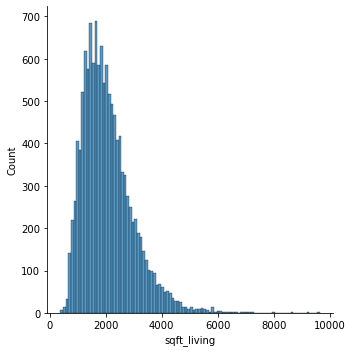

In [117]:
#Plotting sqft_living distribution
dis_sqft_living = sns.displot(train_X, x="sqft_living")

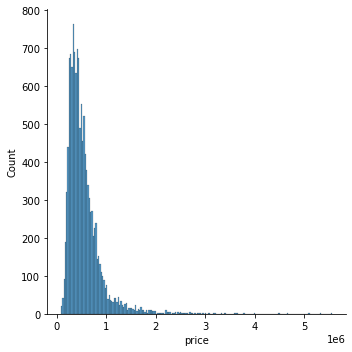

In [118]:
#Plotting price distribution
dis_price = sns.displot(train_y)

It is better to perform data standardization because the dataset contains so many outliers.

In [119]:
#Conducting data standardization
scaler = StandardScaler()
stan_train_X = pd.DataFrame(scaler.fit_transform(train_X),index=train_X.index,columns=train_X.columns)
stan_valid_X = pd.DataFrame(scaler.fit_transform(valid_X),index=valid_X.index,columns=valid_X.columns)

In [120]:
#Checking the data range of standardized data
stan_train_X.describe()

,age,grade,lat,sqft_living,view,waterfront
count,1.296700e+04,1.296700e+04,1.296700e+04,1.296700e+04,1.296700e+04,1.296700e+04
mean,1.010734e-16,-2.182945e-16,1.381198e-14,1.614434e-16,2.485608e-16,3.977072e-16
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.491091e+00,-3.987595e+00,-2.903156e+00,-1.880255e+00,-3.039540e-01,-8.771262e-02
25%,-8.815531e-01,-5.606708e-01,-6.478650e-01,-7.260316e-01,-3.039540e-01,-8.771262e-02
50%,-1.365627e-01,-5.606708e-01,8.591383e-02,-1.822148e-01,-3.039540e-01,-8.771262e-02
75%,6.761542e-01,2.960601e-01,8.470295e-01,5.169782e-01,-3.039540e-01,-8.771262e-02
max,2.403177e+00,4.579715e+00,1.569298e+00,8.396772e+00,4.968783e+00,1.140087e+01


In [121]:
#Building multiple linear regression model using standardized data
model5 = LinearRegression().fit(stan_train_X, train_y)

In [122]:
#Printing model performance measurement (on training data) model5
regressionSummary(train_y, model5.predict(stan_train_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 199015.2076
            Mean Absolute Error (MAE) : 126329.9038
          Mean Percentage Error (MPE) : -4.6252
Mean Absolute Percentage Error (MAPE) : 25.7036


In [123]:
#Using predict() function to make predictions on test set model5
y_pred5 = model5.predict(stan_valid_X)

In [124]:
#Printing model performance measurement (on test data) model5
regressionSummary(valid_y, model5.predict(stan_valid_X))

#Training data Errors < Test data errors, model is not overfitting
#The difference in errors between Training set and Test set are not significant => good


Regression statistics

                      Mean Error (ME) : 7008.3702
       Root Mean Squared Error (RMSE) : 218147.3957
            Mean Absolute Error (MAE) : 128455.7033
          Mean Percentage Error (MPE) : -4.0827
Mean Absolute Percentage Error (MAPE) : 25.3887


In [125]:
#Printing predictive accuracy measurement model5
print('Coefficient of determination (R^2): %.2f'
      % r2_score(valid_y, y_pred5))

Coefficient of determination (R^2): 0.68


In [139]:
#Constructing model with k = 5 using standardized data
model6 = KNeighborsRegressor(n_neighbors=5).fit(stan_train_X, train_y)

In [140]:
#Printing model performance measurement (on training data) model6
regressionSummary(train_y, model6.predict(stan_train_X))


Regression statistics

                      Mean Error (ME) : 1099.6975
       Root Mean Squared Error (RMSE) : 132121.0972
            Mean Absolute Error (MAE) : 74923.0416
          Mean Percentage Error (MPE) : -3.3525
Mean Absolute Percentage Error (MAPE) : 13.8030


In [141]:
#Using predict() function to make predictions on test set model6
y_pred6 = model6.predict(stan_valid_X)

In [142]:
#Printing model performance measurement (on test data) model6
regressionSummary(valid_y, model6.predict(stan_valid_X))


Regression statistics

                      Mean Error (ME) : 6776.7701
       Root Mean Squared Error (RMSE) : 177905.6467
            Mean Absolute Error (MAE) : 94296.5281
          Mean Percentage Error (MPE) : -3.8522
Mean Absolute Percentage Error (MAPE) : 16.9010


In [143]:
#Printing predictive accuracy measurement model6
print('Coefficient of determination (R^2): %.2f'
      % r2_score(valid_y, y_pred6))

Coefficient of determination (R^2): 0.79


In [144]:
#Constructing model with k = 10 using standardized data
model7 = KNeighborsRegressor(n_neighbors=10).fit(stan_train_X, train_y)

In [145]:
#Printing model performance measurement (on training data) model6
regressionSummary(train_y, model7.predict(stan_train_X))


Regression statistics

                      Mean Error (ME) : 542.5488
       Root Mean Squared Error (RMSE) : 144952.7247
            Mean Absolute Error (MAE) : 81148.3905
          Mean Percentage Error (MPE) : -4.2158
Mean Absolute Percentage Error (MAPE) : 15.0430


In [146]:
#Using predict() function to make predictions on test set model6
y_pred7 = model7.predict(stan_valid_X)

In [147]:
#Printing model performance measurement (on test data) model6
regressionSummary(valid_y, model7.predict(stan_valid_X))


Regression statistics

                      Mean Error (ME) : 9212.0443
       Root Mean Squared Error (RMSE) : 178478.9667
            Mean Absolute Error (MAE) : 91851.2790
          Mean Percentage Error (MPE) : -3.8503
Mean Absolute Percentage Error (MAPE) : 16.4034


In [148]:
#Printing predictive accuracy measurement model6
print('Coefficient of determination (R^2): %.2f'
      % r2_score(valid_y, y_pred7))

Coefficient of determination (R^2): 0.78


## Conclusion

* Our optimal model is model6 which was built by using KNN regressor algorithm on standardized data with k = 5
* Model accuracy Coefficient of determination (R^2): 0.79